# 安装配置环境

安装配置torchcam代码库环境。

同济子豪兄 https://space.bilibili.com/1900783

代码运行[云GPU平台](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)

2022-8-13

## 直接运行代码块即可

In [1]:
!pip install numpy pandas matplotlib requests tqdm opencv-python pillow -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


You should consider upgrading via the 'C:\Users\pc\Desktop\github\DataWhale_qing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## 下载安装Pytorch

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


You should consider upgrading via the 'C:\Users\pc\Desktop\github\DataWhale_qing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## 下载安装 mmcv-full

In [3]:
# 安装mmcv -full
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
  Using cached yapf-0.32.0-py2.py3-none-any.whl (190 kB)
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)


You should consider upgrading via the 'C:\Users\pc\Desktop\github\DataWhale_qing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## 下载中文字体文件

In [16]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf


--2023-01-28 21:57:55--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: 'SimHei.ttf'

     0K .......... .......... .......... .......... ..........  0% 1.61M 6s
    50K .......... .......... .......... .......... ..........  1% 5.67M 4s
   100K .......... .......... .......... .......... ..........  1% 7.89M 3s
   150K .......... .......... .......... .......... ..........  2% 9.86M 2s
   200K .......... .......... .......... .......... ..........  2% 12.5M 2s
   250K .......... .......... .......... .......... ..........  3% 12.7M 2s
   300K .......... ......

## 下载 ImageNet 1000类别信息

In [14]:
import requests
print('downloading with requests')
url = 'https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/meta_data/imagenet_class_index.csv'
r = requests.get(url)
with open('imagenet_class_index.csv', 'wb') as code:
    code.write(r.content)

downloading with requests


In [5]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/meta_data/imagenet_class_index.csv


'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


## 创建目录

In [15]:
import os

In [16]:
# 存放测试图片
os.mkdir('test_img')

# 存放结果文件
os.mkdir('output')

# 存放训练得到的模型权重
os.mkdir('checkpoint')

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'test_img'

In [1]:
# 下载样例模型文件
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/checkpoints/fruit30_pytorch_20220814.pth -P checkpoint

# 下载 类别名称 和 ID索引号 的映射字典
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/labels_to_idx.npy
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/idx_to_labels.npy


--2023-01-28 20:57:23--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/checkpoints/fruit30_pytorch_20220814.pth
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44854477 (43M) [binary/octet-stream]
Saving to: 'checkpoint/fruit30_pytorch_20220814.pth'

     0K .......... .......... .......... .......... ..........  0% 1.48M 29s
    50K .......... .......... .......... .......... ..........  0% 3.73M 20s
   100K .......... .......... .......... .......... ..........  0% 7.15M 15s
   150K .......... .......... .......... .......... ..........  0% 7.00M 13s
   200K .......... .......... .......... .......... ..........  0% 9.81M 11s
   250K .......... .......... .......... ........

In [2]:
# 下载测试图像文件 至 test_img 文件夹

# 边牧犬，来源：https://www.woopets.fr/assets/races/000/066/big-portrait/border-collie.jpg
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/border-collie.jpg -P test_img

!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/cat_dog.jpg -P test_img

!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/0818/room_video.mp4 -P test_img

# 草莓图像，来源：https://www.pexels.com/zh-cn/photo/4828489/
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/0818/test_草莓.jpg -P test_img

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_fruits.jpg -P test_img

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_orange_2.jpg -P test_img 

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_bananan.jpg -P test_img

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_kiwi.jpg -P test_img

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_石榴.jpg -P test_img

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_orange.jpg -P test_img

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_lemon.jpg -P test_img

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/test_火龙果.jpg -P test_img

# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/watermelon1.jpg -P test_img

# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/banana1.jpg -P test_img

# # 下载测试视频文件 至 test_img 文件夹

!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220716-mmclassification/test/0818/fruits_video.mp4 -P test_img


--2023-01-28 20:57:27--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/test/border-collie.jpg
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 312888 (306K) [image/jpeg]
Saving to: 'test_img/border-collie.jpg'

     0K .......... .......... .......... .......... .......... 16% 1.59M 0s
    50K .......... .......... .......... .......... .......... 32% 4.25M 0s
   100K .......... .......... .......... .......... .......... 49% 5.45M 0s
   150K .......... .......... .......... .......... .......... 65% 12.7M 0s
   200K .......... .......... .......... .......... .......... 81% 10.1M 0s
   250K .......... .......... .......... .......... .......... 98% 13.0M 0s
   300K .....      

## 安装torchcam

In [3]:
# 删除原有的 torch-cam 目录（如有）
!rm -rf torch-cam

'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [5]:
!dir


 驱动器 C 中的卷没有标签。
 卷的序列号是 5819-0E99

 C:\Users\pc\Desktop\github\DataWhale_qing\imahge_classify\6-可解释性分析、显著性分析\1.torch-cam工具包：CAM热力图 的目录

2023/01/28  20:58    <DIR>          .
2023/01/27  21:36    <DIR>          ..
2023/01/28  20:57    <DIR>          checkpoint
2022/08/14  13:49               769 idx_to_labels.npy
2023/01/28  20:53            37,074 imagenet_class_index.csv
2022/08/14  17:27               769 labels_to_idx.npy
2023/01/28  20:40    <DIR>          output
2023/01/28  20:57    <DIR>          test_img
2023/01/28  20:40    <DIR>          torch-cam
2023/01/28  20:58           139,901 【A】安装配置环境.ipynb
2023/01/28  20:39         2,617,060 【B】torchcam命令行.ipynb
2023/01/28  20:39        12,084,249 【C1】Pytorch预训练ImageNet图像分类-单张图像.ipynb
2023/01/27  21:36            10,991 【C2】Pytorch预训练ImageNet图像分类-视频文件.ipynb
2023/01/27  21:36         2,308,965 【C3】Pytorch预训练ImageNet图像分类-摄像头实时画面.ipynb
2023/01/27  21:36        13,217,588 【D1】自己训练的水果分类模型-单张图像.ipynb
2023/01/27  21:36            10,369 【D2】

In [6]:
# 下载安装 torch-cam
!git clone https://github.com/frgfm/torch-cam.git
!pip install -e torch-cam/.

Cloning into 'torch-cam'...


Obtaining file:///C:/Users/pc/Desktop/github/DataWhale_qing/imahge_classify/6-%E5%8F%AF%E8%A7%A3%E9%87%8A%E6%80%A7%E5%88%86%E6%9E%90%E3%80%81%E6%98%BE%E8%91%97%E6%80%A7%E5%88%86%E6%9E%90/1.torch-cam%E5%B7%A5%E5%85%B7%E5%8C%85%EF%BC%9ACAM%E7%83%AD%E5%8A%9B%E5%9B%BE/torch-cam
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Running setup.py develop for torchcam


You should consider upgrading via the 'C:\Users\pc\Desktop\github\DataWhale_qing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


## 重启kernel

In [7]:
# 验证安装成功
import torchcam

## 设置matplotlib中文字体

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# # windows操作系统
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [ ]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [ ]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果报错 Unable to establish SSL connection.，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf --no-check-certificate
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

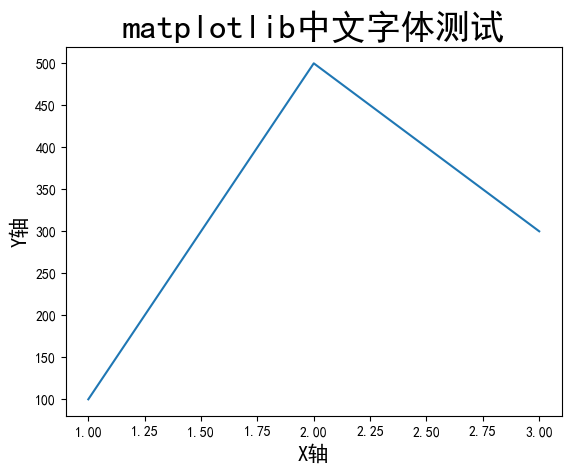

In [15]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

如果上图绘制不成功，重启kernel后重新运行`设置matplotlib中文字体`部分的代码即可